# Data Exploration Penguin Dataset

In [2]:
#Importing Libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('penguins.csv')

In [7]:
#Exploring the Data
print("Column Headings:")
print(df.columns)
print("---------------------------------------------------------------------------------------------")
print("First 5 rows from the dataset:")
print(df.head())
print("---------------------------------------------------------------------------------------------")
print("Last 5 rows from the dataset:")
print(df.tail())

Column Headings:
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
---------------------------------------------------------------------------------------------
First 5 rows from the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
---------------------------------------------------------------------------------------------
Last 5 rows from the dataset:
   

In [8]:
#Creating SUBSET
subset_head=df.head(n=100)
print(subset_head)

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             NaN            NaN                NaN   
4   Adelie  Torgersen            36.7           19.3              193.0   
..     ...        ...             ...            ...                ...   
95  Adelie      Dream            40.8           18.9              208.0   
96  Adelie      Dream            38.1           18.6              190.0   
97  Adelie      Dream            40.3           18.5              196.0   
98  Adelie      Dream            33.1           16.1              178.0   
99  Adelie      Dream            43.2           18.5              192.0   

    body_mass_g     sex  
0        3750.0    MALE  
1        3800.0  FEMALE  
2        3250.0  FEMA

In [9]:
#Understanding the data
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [16]:
#Missing Values
subset_head=subset_head.dropna()

In [39]:
#Grouped Mean
print(df.groupby('body_mass_g')['bill_length_mm'].mean())

body_mass_g
2700.0    46.900000
2850.0    36.450000
2900.0    37.350000
2925.0    37.900000
2975.0    37.500000
            ...    
5850.0    50.933333
5950.0    47.500000
6000.0    49.950000
6050.0    59.600000
6300.0    49.200000
Name: bill_length_mm, Length: 94, dtype: float64


# Descriptive Statistics

In [43]:
#Grouped median
print(df.groupby(['species','bill_length_mm'])[['island','body_mass_g']].median())

                        body_mass_g
species bill_length_mm             
Adelie  32.1                 3050.0
        33.1                 2900.0
        33.5                 3600.0
        34.0                 3400.0
        34.1                 3475.0
...                             ...
Gentoo  53.4                 5500.0
        54.3                 5650.0
        55.1                 5850.0
        55.9                 5600.0
        59.6                 6050.0

[208 rows x 1 columns]


In [17]:
#Covariance
print('Covariance:')
df.cov()

Covariance:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [18]:
#Correlation
print('Correlation:')
df.corr()

Correlation:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


# Data Visualization

In [21]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

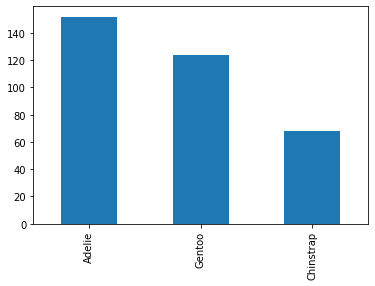

In [24]:
#Histogram
df['species'].value_counts().plot(kind='bar')

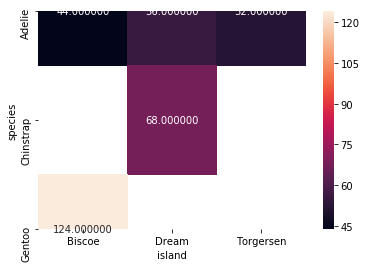

In [37]:
#Heat Map
group = df.groupby(['species', 'island']) 
species_bill_length = group.size().unstack() 

sns.heatmap(species_bill_length, annot = True, fmt ="f")

C:\Users\Arnab\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Arnab\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Arnab\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


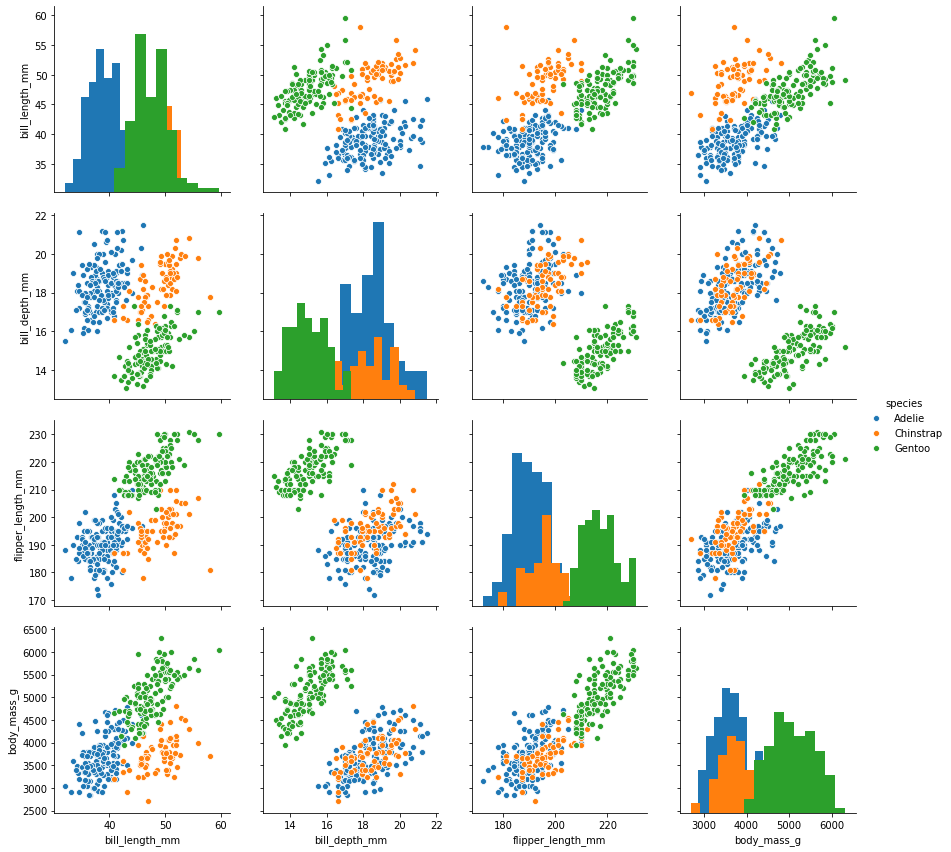

In [28]:
#Pairplot
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

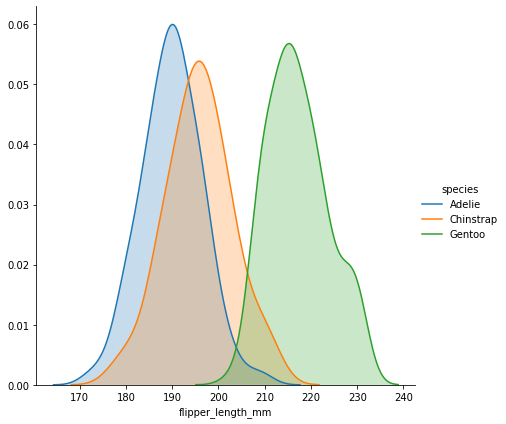

In [30]:
#KDE Plot
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

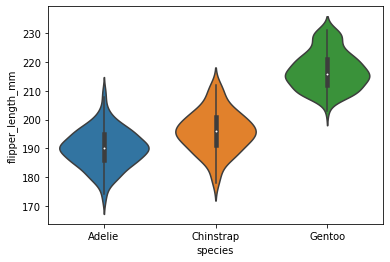

In [31]:
#Flipper length distribution
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

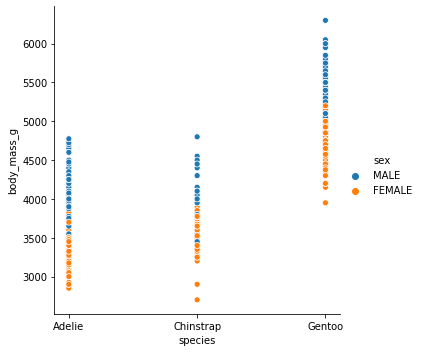

In [44]:
#According to body mass and the species distribution of male and female penguins
sns.relplot(x='species', y='body_mass_g', hue='sex',
            data=df)

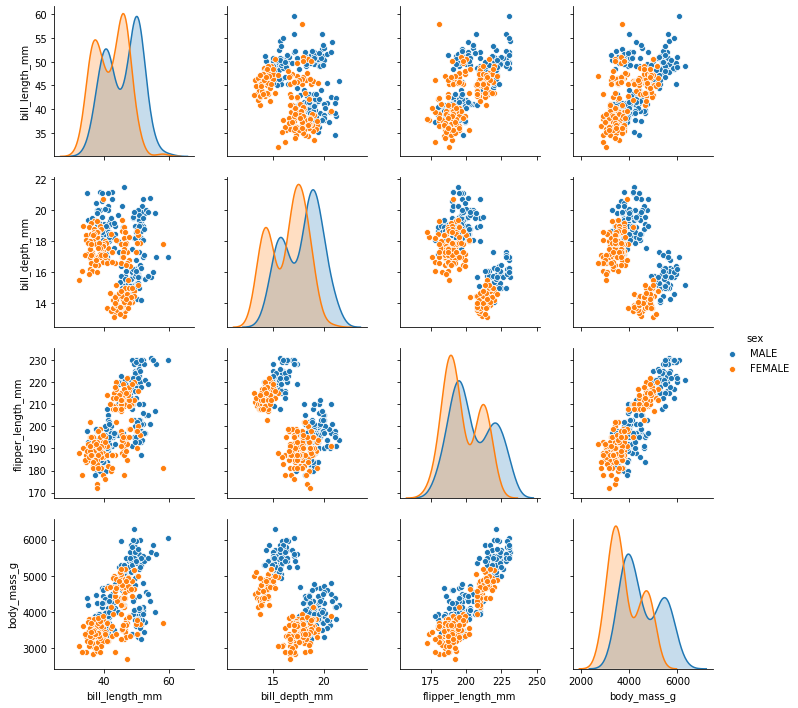

In [45]:
sns.pairplot(df,hue='sex')

# Anova Analysis

In [47]:
#Anova Analysis
mod=ols('body_mass_g~species+bill_length_mm',data=df).fit()
aov=sm.stats.anova_lm(mod,type=2)

print(aov)

                   df        sum_sq       mean_sq           F         PR(>F)
species           2.0  1.468642e+08  7.343211e+07  521.279555  5.219469e-104
bill_length_mm    1.0  2.482978e+07  2.482978e+07  176.261516   1.158990e-32
Residual        338.0  4.761371e+07  1.408690e+05         NaN            NaN


In [ ]:
#Comment: Hence species and bill length mm are both significant with the body mass of the penguins

In [49]:
mod1=ols('bill_length_mm~island+flipper_length_mm+bill_depth_mm',data=df).fit()
aov1=sm.stats.anova_lm(mod1,type=2)

print(aov1)

                      df       sum_sq      mean_sq           F        PR(>F)
island               2.0  1565.598964   782.799482   58.951545  1.112515e-22
flipper_length_mm    1.0  4011.939445  4011.939445  302.133605  9.173321e-49
bill_depth_mm        1.0   111.747506   111.747506    8.415550  3.964742e-03
Residual           337.0  4474.919612    13.278693         NaN           NaN


In [ ]:
#Comment: Hence island,flipper_length_mm and bill_depth_mm are significant with the bill_length_mm of the penguins

In [48]:
#Regression
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     406.3
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          1.03e-111
Time:                        10:01:28   Log-Likelihood:                -2510.6
No. Observations:                 342   AIC:                             5029.
Df Residuals:                     338   BIC:                             5044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              153.7397 